In [2]:
# simple OLS regression

# load data
import pandas as pd

df = pd.read_csv('./boston_house_prices.csv', header=None)
df.columns = df.iloc[0, :]
df = df.drop([0])
print(df.head())

0     CRIM  ZN INDUS CHAS    NOX     RM   AGE     DIS RAD  TAX PTRATIO  \
1  0.00632  18  2.31    0  0.538  6.575  65.2    4.09   1  296    15.3   
2  0.02731   0  7.07    0  0.469  6.421  78.9  4.9671   2  242    17.8   
3  0.02729   0  7.07    0  0.469  7.185  61.1  4.9671   2  242    17.8   
4  0.03237   0  2.18    0  0.458  6.998  45.8  6.0622   3  222    18.7   
5  0.06905   0  2.18    0  0.458  7.147  54.2  6.0622   3  222    18.7   

0       B LSTAT  MEDV  
1   396.9  4.98    24  
2   396.9  9.14  21.6  
3  392.83  4.03  34.7  
4  394.63  2.94  33.4  
5   396.9  5.33  36.2  


In [3]:
# construct linear regression GD
import numpy as np

class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20) -> None:
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # w_0 + w_i (i in X.row[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return self.net_input(X)     # classification is np.where(self.net_input(X) >= 0, 1, -1)

In [4]:
# train model

X1 = df[['RM']].values
y1 = df['MEDV'].values

print(df[['RM']].shape)  # shape: (506, 1)
print(df['RM'].shape)  # shape: (506, )

from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
ss_y = StandardScaler()
X_std = ss_X.fit_transform(X1)
y_std = ss_y.fit_transform(y1[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

(506, 1)
(506,)


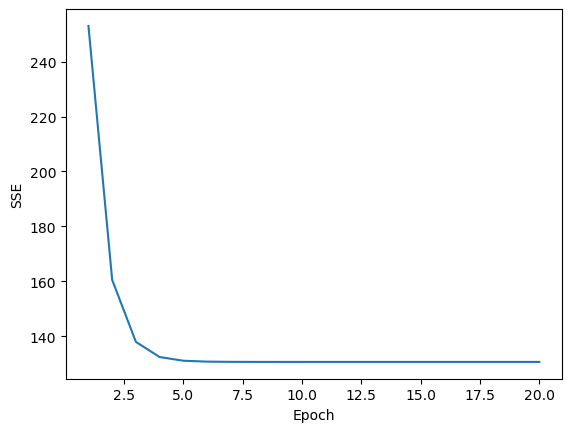

<function matplotlib.pyplot.show(close=None, block=None)>

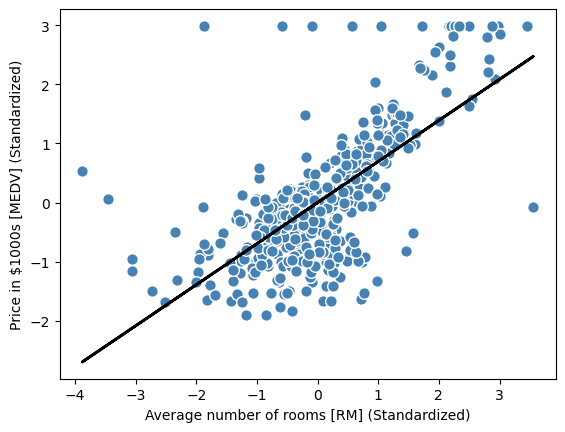

In [5]:
# visualize cost(SSE) curve and prediction

import matplotlib.pyplot as plt
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.show()

plt.scatter(X_std, y_std, c='steelblue', edgecolor='white', s=70)
plt.plot(X_std, lr.predict(X_std), color='black', lw=2)
plt.xlabel('Average number of rooms [RM] (Standardized)')
plt.ylabel('Price in $1000s [MEDV] (Standardized)')
plt.show()

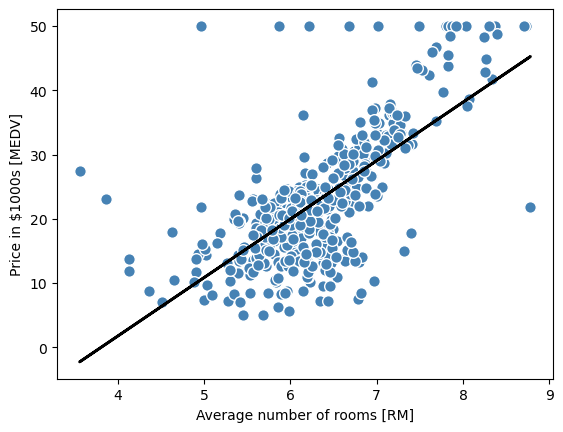

In [6]:
# using sklearn
X = X1.astype(float)  # can't be string! should convert string into int/float type for iteration
y = y1.astype(float)

from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, slr.predict(X), color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

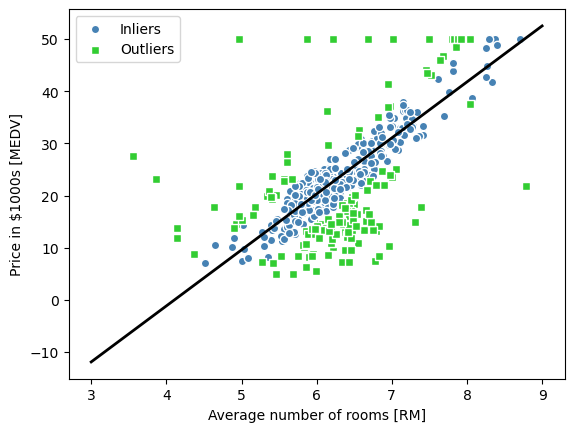

In [8]:
# Random Sample Consensus, RANSAC for more robusting regression

from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=100, 
                         min_samples=50, 
                         loss='absolute_error', 
                         residual_threshold=5.0, 
                         random_state=0)
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='steelblue', edgecolors='white', 
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], 
            c='limegreen', edgecolors='white', 
            marker='s', label='Outliers')
plt.plot(line_X, line_y, color='black', lw=2)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper left')
plt.show()